# Marginal Abatement Cost Curve for Methane Gas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For this empirical case study we are relying on a dataset published by the International Energy Association for methane emissions from the oil and gas sector. One important starting point is that Methane is more powerful than CO2 in trapping heat in the atmosphere, 80 times more potent in the first 20 years and 20 times more powerful when average over 100 years. Methane emissions from the energy sector contribute 1/3 of all human caused methane emissions.  

**This dataset and documentation are from**: 

- Methane Emissions from Oil and Gas Report from IEA (https://www.iea.org/reports/methane-emissions-from-oil-and-gas)
- IEA Methane Tracker (2021) (https://www.iea.org/articles/methane-tracker-database).

Let's start off with a summary about global oil and gas methane emissions from their report:

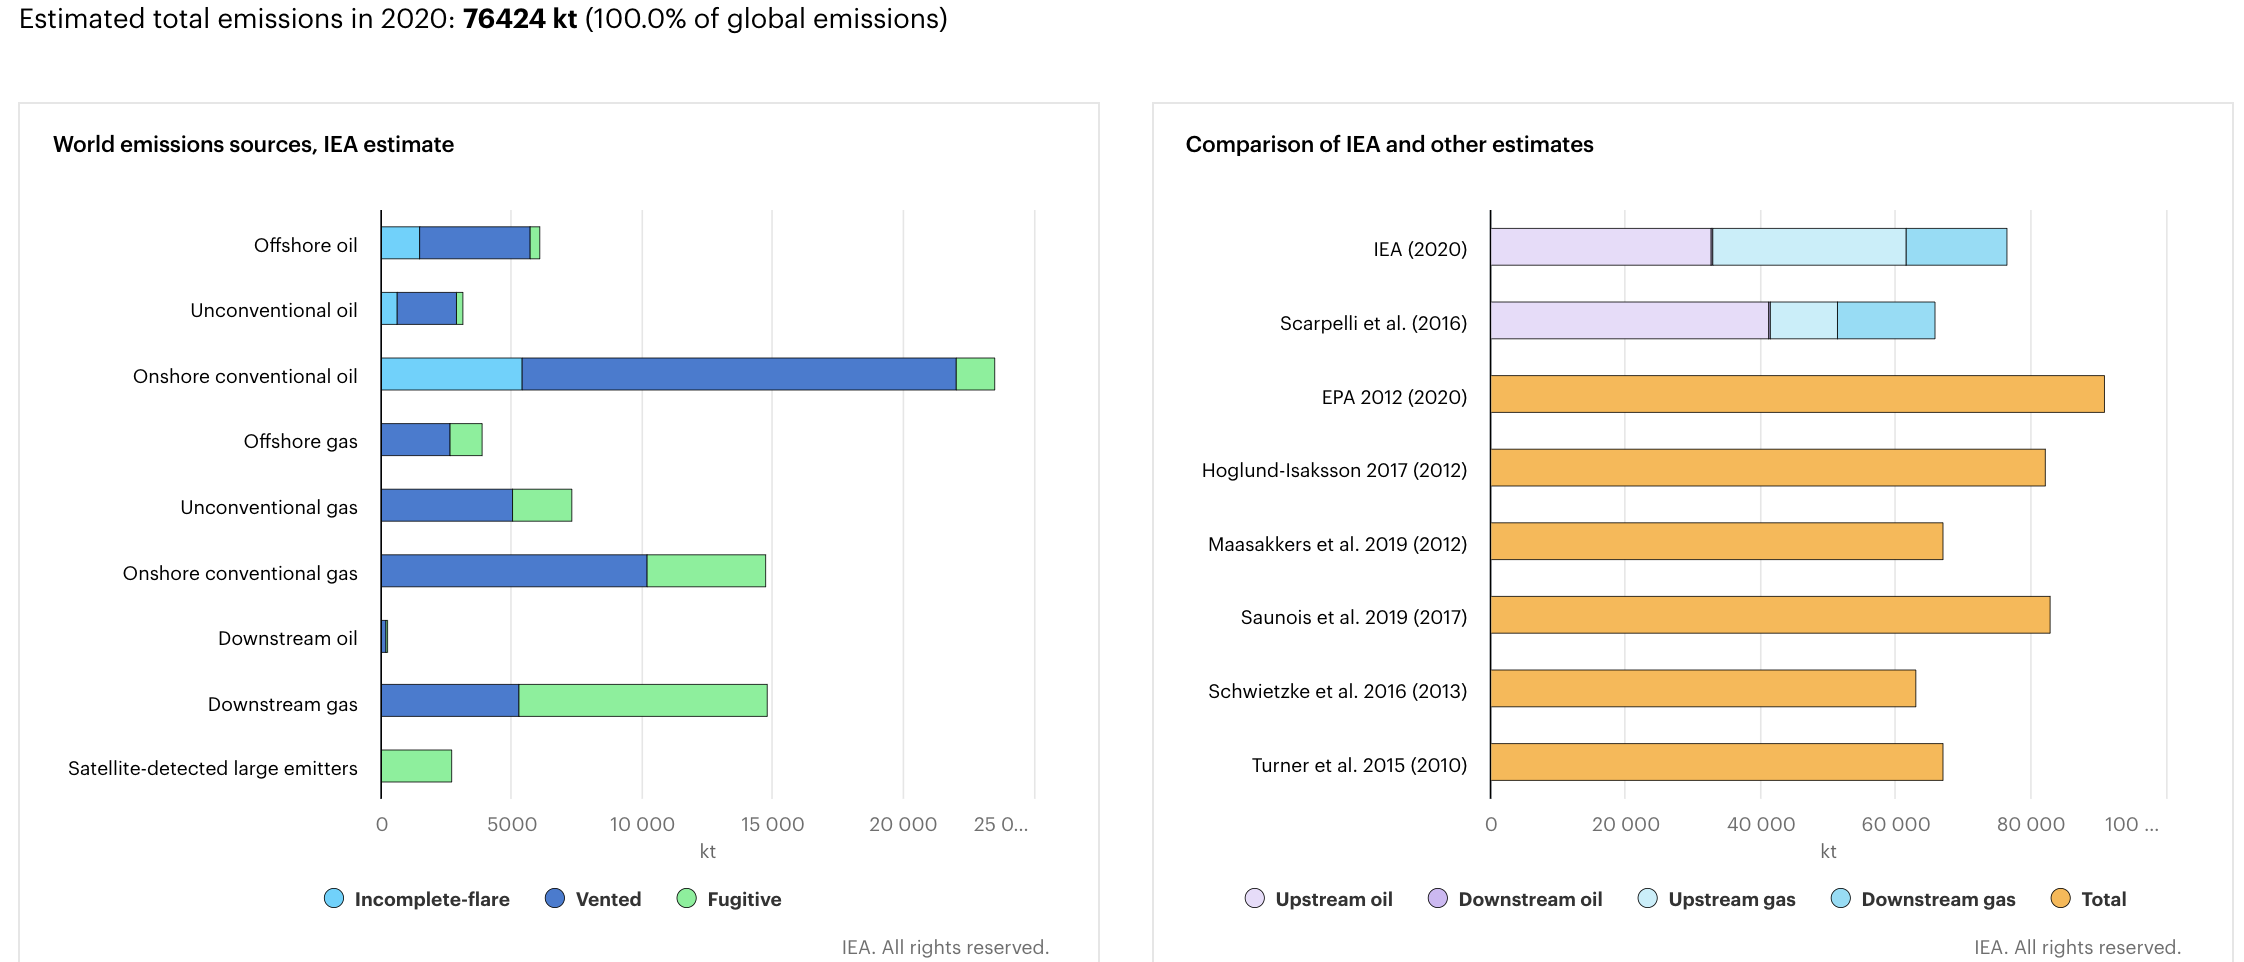

The chart on the left offers indications of where these methane emissions occur within the oil and gas industry.  The chart on the right indicates where the IEA estimates fall in respect to other recent studies.  This clearly illustrates the enormous potential of methane emission abatement in the world's oil and gas sector. With high abatement potential, it is important to understand the various abatement technologies and their costs. 

## Preparing Dataset

We start by importing a dataset on methane abatement from the International Environmental Agency (IEA): 

In [6]:
abatement = pd.read_csv("../data/raw-data/iea/IEA-methane-abatement-data.csv")
abatement

,country,region,source,type,savings,cost
0,Japan,Asia Pacific,Onshore conventional gas,Replace pumps,0.33,-10.820000
1,Korea,Asia Pacific,Offshore oil,Replace with instrument air systems,0.01,-10.480000
2,Japan,Asia Pacific,Downstream gas,Replace with instrument air systems,0.53,-10.460000
3,Japan,Asia Pacific,Offshore gas,Replace with instrument air systems,0.02,-10.460000
4,Japan,Asia Pacific,Offshore oil,Replace with instrument air systems,0.01,-10.460000
...,...,...,...,...,...,...
3803,Lebanon,Middle East,Offshore oil,Other,0.81,81.050003
3804,Ghana,Africa,Offshore oil,Other,0.15,89.760002
3805,Argentina,Central and South America,Unconventional oil,Other,0.02,117.120003
3806,Canada,North America,Unconventional oil,Other,0.01,136.089996


In [8]:
# remove outliers
abatement = abatement[(abatement["cost"] > -10) & (abatement["cost"] <10)]
abatement = abatement[abatement["savings"] < 200]
abatement

,country,region,source,type,savings,cost
6,Japan,Asia Pacific,Onshore conventional oil,Replace pumps,0.07,-9.89
7,Japan,Asia Pacific,Onshore conventional oil,Upstream LDAR,0.05,-9.47
8,Japan,Asia Pacific,Onshore conventional gas,Upstream LDAR,1.42,-9.47
9,Malaysia,Asia Pacific,Downstream gas,Replace with instrument air systems,0.24,-9.25
10,Malaysia,Asia Pacific,Offshore gas,Replace with instrument air systems,6.32,-9.25
...,...,...,...,...,...,...
3719,Norway,Europe,Offshore oil,Upstream LDAR,0.09,9.09
3720,Kuwait,Middle East,Onshore conventional gas,Early replacement of devices,0.98,9.44
3721,Kuwait,Middle East,Onshore conventional oil,Early replacement of devices,14.87,9.44
3722,United States,North America,Offshore gas,Upstream LDAR,2.97,9.53


## Plotting MAC Curve

#### Plotting Functions
Building the MAC requires some data manipulations to build this specific visualization.  The first is that the width of the columns will be the quantity of abatement.  The height ( whether positive or negative) will be the cost.  

For drawing the plot we need to actually find the middle point in each column so that we place each abatement technology at the right place on the MAC. The seconds part runs the function on our x and y axis.

In [9]:
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

In [20]:
def methane_tax(tax, table):
    if tax < min(table["cost"]):
        print("No Abatement")
    else:
        abated = table[table["cost"] <= tax]
        total_abatement = sum(abated["savings"])
        abatement_technologies = abatement['type']
        
        print('Total Abatement (kt CH4): ', np.round(total_abatement,2))
        print("")

#### Plot the graph, with tax line

In [73]:
# plot abatement using barplot with a tax line
def mckinsey_curve(table, tax, title):
    print(f"Methane Tax ($/MBtu): ${tax}")
    methane_tax(tax, table)
    plt.figure(figsize=(16,10))
    plt.bar(find_x_pos(table["savings"]), table["cost"], width=table["savings"], edgecolor='black')
    plt.title(title)
    plt.xlabel('Abatement Potential KtCH4')
    plt.ylabel('Abatement Cost $/MBtu')
    plt.axhline(y=tax, color='r',linewidth = 2)

## North America

In [74]:
abatement_na = abatement[abatement["region"] == "North America"]
abatement_na

,country,region,source,type,savings,cost
1349,Mexico,North America,Offshore oil,Replace with instrument air systems,24.719999,-3.07
1350,Mexico,North America,Offshore gas,Replace with instrument air systems,2.160000,-3.07
1351,Mexico,North America,Downstream gas,Replace with instrument air systems,0.790000,-3.07
1356,United States,North America,Satellite - upstream,Upstream LDAR,177.279999,-3.04
1366,Mexico,North America,Onshore conventional oil,Blowdown capture,0.040000,-3.00
...,...,...,...,...,...,...
3681,United States,North America,Downstream oil,Install flares,3.050000,8.40
3685,Canada,North America,Downstream gas,Downstream LDAR,27.040001,8.50
3686,Canada,North America,Downstream oil,Downstream LDAR,0.060000,8.50
3722,United States,North America,Offshore gas,Upstream LDAR,2.970000,9.53


Methane Tax ($/MBtu): $4
Total Abatement (kt CH4):  3584.73



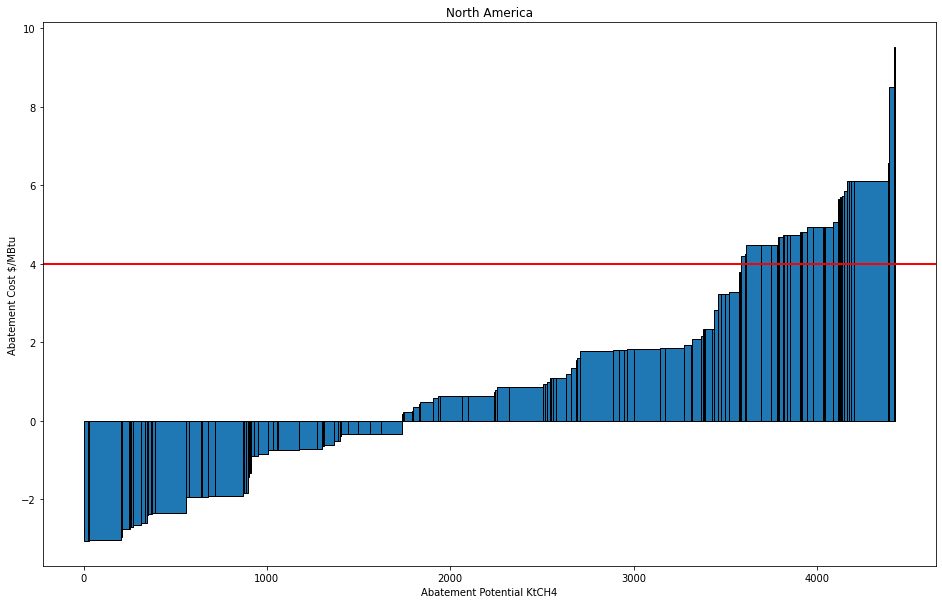

In [75]:
mckinsey_curve(abatement_na, 4, "North America")

## Asia Pacific

In [76]:
abatement_ap = abatement[abatement["region"] == "Asia Pacific"]
abatement_ap

,country,region,source,type,savings,cost
6,Japan,Asia Pacific,Onshore conventional oil,Replace pumps,0.07,-9.89
7,Japan,Asia Pacific,Onshore conventional oil,Upstream LDAR,0.05,-9.47
8,Japan,Asia Pacific,Onshore conventional gas,Upstream LDAR,1.42,-9.47
9,Malaysia,Asia Pacific,Downstream gas,Replace with instrument air systems,0.24,-9.25
10,Malaysia,Asia Pacific,Offshore gas,Replace with instrument air systems,6.32,-9.25
...,...,...,...,...,...,...
3684,Indonesia,Asia Pacific,Downstream gas,Downstream LDAR,10.43,8.41
3696,Pakistan,Asia Pacific,Downstream gas,Downstream LDAR,11.75,8.67
3697,Pakistan,Asia Pacific,Downstream oil,Downstream LDAR,0.02,8.67
3698,Bangladesh,Asia Pacific,Downstream gas,Downstream LDAR,6.14,8.67


Methane Tax ($/MBtu): $4
Total Abatement (kt CH4):  5138.13



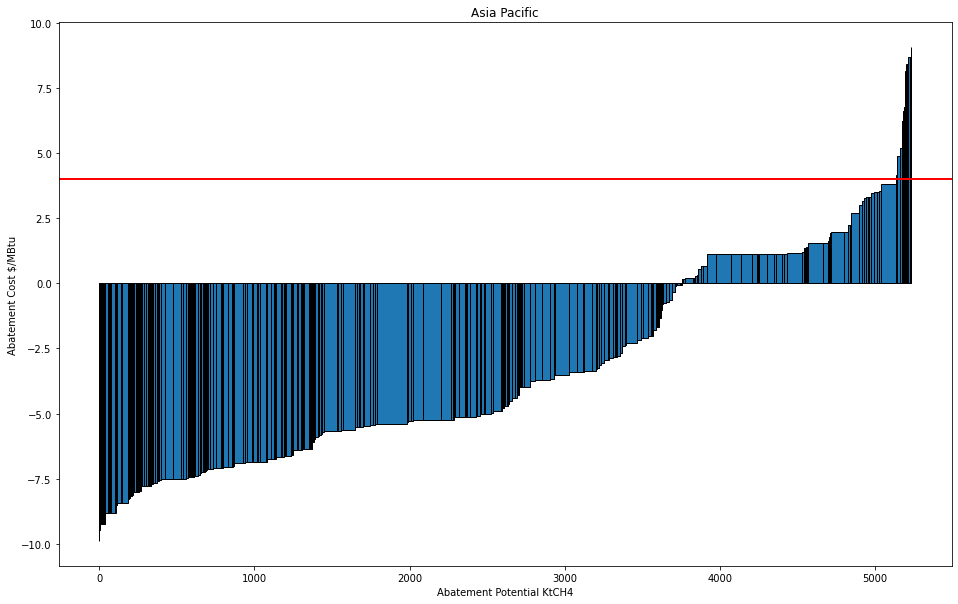

In [77]:
mckinsey_curve(abatement_ap, 4, "Asia Pacific")

## World

Methane Tax ($/MBtu): $4
Total Abatement (kt CH4):  27582.14



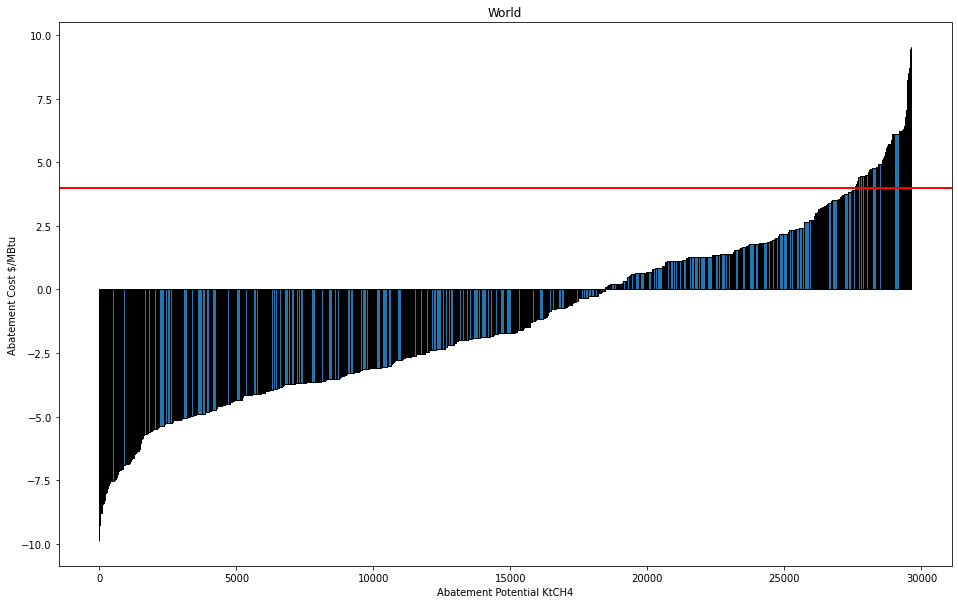

In [78]:
mckinsey_curve(abatement, 4, "World")